### **Automated libraries for modeling ML Probelms-Autovi-ML**

In this notebook I'm going to show how to use of AUTOVIML (automated) libriry to develop machine learning model. Therefor, I wil use bank_ensample data set also, I did this prbolem in manualy with hyper parameter tuning and using DNN: https://github.com/KrishArul26/bank-full_data.csv-Ensemble-Techniques-and-DNN-/blob/main/bank_full_Ensample_Analysis.ipynb

DATASET: https://raw.githubusercontent.com/KrishArul26/Data_set/main/bank-full.csv

Automated Machine Learning, often abbreviated as AutoML, is an emerging field in which the process of building machine learning models to model data is automated. AutoML has the capability to make modelling easier and more accessible for everyone.

### **Autovi-ML**

Auto_ViML help with:

**data cleaning:** you can send in your entire dataframe as is and Auto_ViML will suggest changes to help with missing values, formatting variables, adding variables, etc. 

**Assists with variable classification:** Auto_ViML classifies variables automatically. This is very helpful when you have hundreds if not thousands of variables since it can readily identify which of those are numeric vs categorical vs NLP text vs date-time variables and so on.

**Performs feature reduction automatically**: When you have small data sets and you know your domain well, it is easy to perhaps do EDA and identify which variables are important. But when you have a very large data set with hundreds if not thousands of variables, selecting the best features from your model can mean the difference between a bloated and highly complex model or a simple model with the fewest and most information-rich features. 


In [ ]:

!pip install autoviml

In [ ]:

!pip install shap

In [3]:
from __future__ import print_function
import sys,tempfile, urllib, os
import pandas as pd
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.681. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.0.45.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [4]:
import pandas as pd


url="https://raw.githubusercontent.com/KrishArul26/Data_set/main/bank-full.csv"
bank = pd.read_csv(url,sep=";")

In [5]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### **Train-Test Split**

In [6]:
index = int(0.8*bank.shape[0])
train_df = bank[:index]
test_df = bank[index:]
sample_submission=''
scoring_parameter = 'balanced-accuracy'

# Decide target
target='y'


##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise XGBoost will take too long for 10,000+ rows.
Training Set Shape = (36168, 17)
    Training Set Memory Usage = 4.69 MB
Test Set Shape = (9043, 17)
    Test Set Memory Usage = 1.17 MB
Single_Label Target: ['y']

################ Binary_Classification VISUALIZATION Started #####################
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
          no:   33735  ->   93.3%
         yes:    2433  ->    6.7%
String or Multi Class target: y transformed as follows: {'no': 0, 'yes': 1}
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  7
    Number of String-Categorical Columns =  6
    Number of 

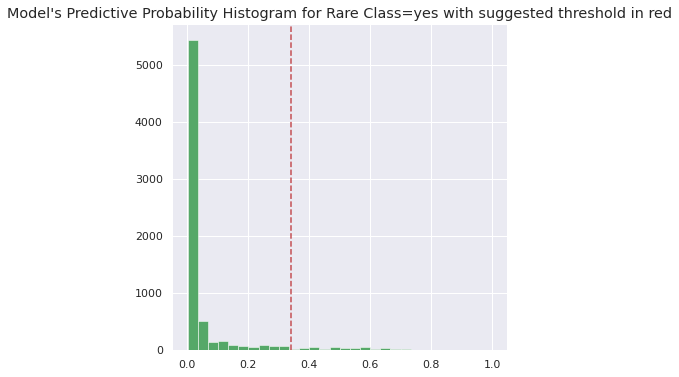

    Using threshold=0.5. However, 0.341 provides better F1=0.60 for rare class...
########################################################
XGBoost Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 94.5%
Balanced Accuracy = 68.12% with Threshold = 0.50
Confusion Matrix:
[[6643  104]
 [ 303  184]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6747
           1       0.64      0.38      0.47       487

    accuracy                           0.94      7234
   macro avg       0.80      0.68      0.72      7234
weighted avg       0.94      0.94      0.94      7234

Balanced Accuracy = 79.05% with Threshold = 0.34
Confusion Matrix:
[[6539  208]
 [ 189  298]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6747
           1       0.59      0.61      0.60       487

    accuracy                           0.95      7234
   macro avg       0.78      0.79  

After multiple models, Ensemble Model Results:
Binary Class Model Metrics Report
#####################################################
    Accuracy          = 94.3%
    Balanced Accuracy = 74.1%
    Precision         = 58.7%
    Average Precision = 77.6%
    Recall            = 50.7%
    F1 Score          = 54.4%
#####################################################
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      6747
           1       0.59      0.51      0.54       487

    accuracy                           0.94      7234
   macro avg       0.78      0.74      0.76      7234
weighted avg       0.94      0.94      0.94      7234

[[6573  174]
 [ 240  247]]
#############################################################################
Single Model is better than Ensembling Models for this data set.


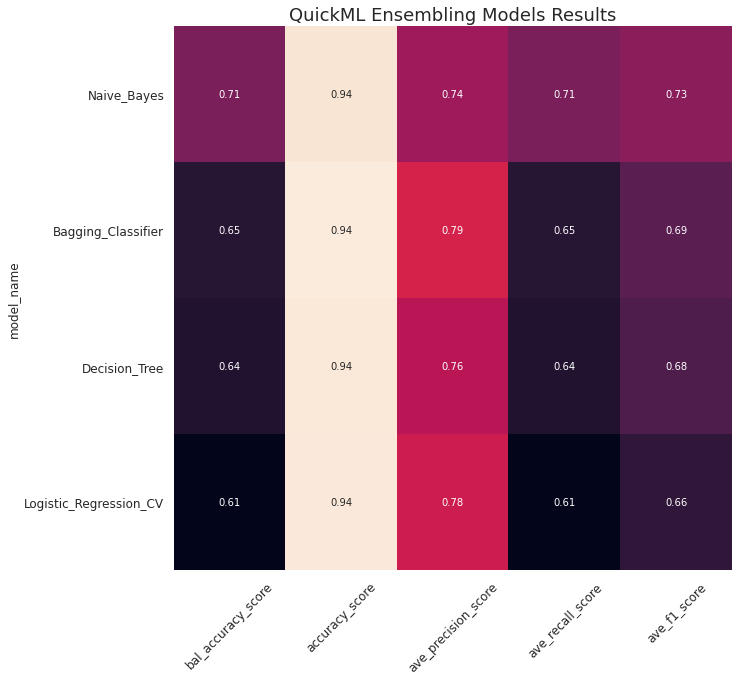

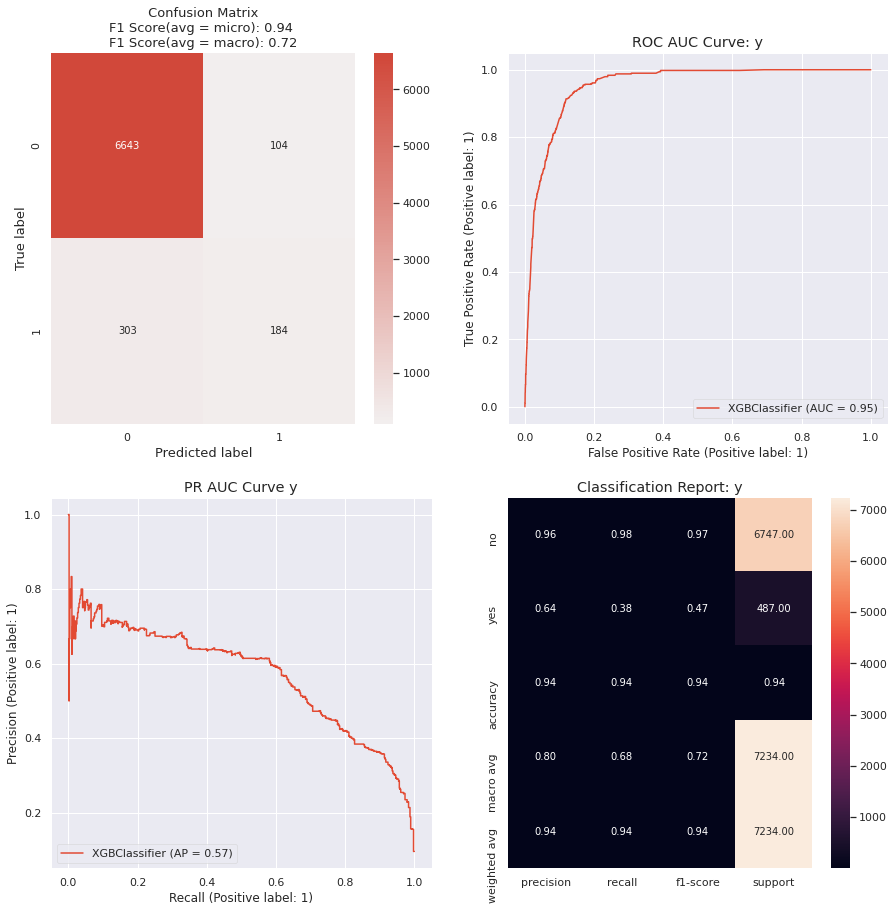

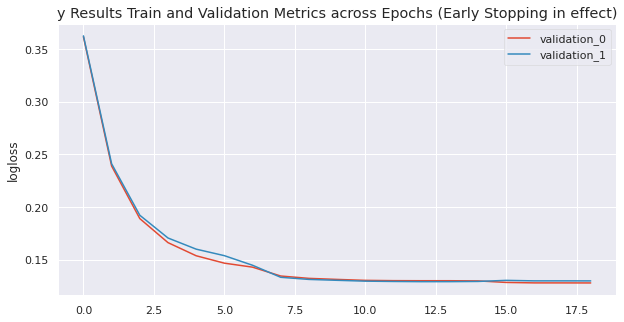

    Time taken for this Target (in seconds) = 88
    Binning_Flag set to False or there are no float vars in data set to be binned
Performing MinMax scaling of train and test data...
#####   T R A I N I N G   M O D E L   O N    F U L L   T R A I N  D A T A  #############
     Actual Training time taken in seconds = 0
Training of models completed. Now starting predictions on test data...
    Making test Data predictions using modified Threshold = 0.341
    Calculating weighted average ensemble of 5 classifiers
########################################################
Completed Ensemble predictions on held out data
    Plotting Feature Importances to explain the output of model
############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 96
Writing Output files to disk...
    Saving predictions to ./y/y_Binary_Classification_test_modified.csv
    Saving predictions to ./y/y_Binary_Classification_submission.csv
    Saving p

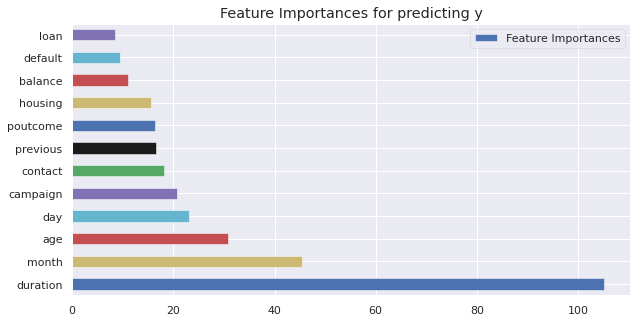

In [7]:
#### If Boosting_Flag = True => XGBoost, Fase=>ExtraTrees, None=>Linear Model
model, features, trainm, testm = Auto_ViML(train_df, target, test_df, sample_submission,
                                    scoring_parameter=scoring_parameter,
                                    hyper_param='GS',feature_reduction=True,
                                     Boosting_Flag=True,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False,                                    
                                    Imbalanced_Flag=False, 
                                    verbose=1)

In [9]:
print(testm)

       duration  month  housing  contact  day  age  default  loan  poutcome  \
36168      0.00   0.80     1.00     0.00 0.33 0.21     0.00  0.00      1.00   
36169      0.05   0.80     1.00     0.00 0.33 0.28     0.00  0.00      1.00   
36170      0.05   0.80     1.00     0.00 0.33 0.28     0.00  0.00      0.00   
36171      0.14   0.80     1.00     0.00 0.33 0.39     0.00  0.00      0.67   
36172      0.05   0.80     0.00     0.00 0.33 0.18     0.00  0.00      0.00   
...         ...    ...      ...      ...  ...  ...      ...   ...       ...   
45206      0.20   0.90     0.00     0.00 0.53 0.42     0.00  0.00      1.00   
45207      0.09   0.90     0.00     0.00 0.53 0.68     0.00  0.00      1.00   
45208      0.23   0.90     0.00     0.00 0.53 0.70     0.00  0.00      0.67   
45209      0.10   0.90     0.00     0.50 0.53 0.50     0.00  0.00      1.00   
45210      0.07   0.90     0.00     0.00 0.53 0.24     0.00  0.00      0.33   

       balance  campaign  previous  y_proba_no  y_p

### **Confiusion Matrix**

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print("XGBoost Model Confiusion matrix"+"\n"+str(confusion_matrix(test_df[target].values,testm['y_XGBoost_predictions'].values)))
print("Bagging_Classifier Confiusion matrix"+"\n"+str(confusion_matrix(test_df[target].values,testm['y_Bagging_Classifier_predictions'].values)))
print("Decision_Treel Confiusion matrix"+"\n"+str(confusion_matrix(test_df[target].values,testm['y_Decision_Tree_predictions'].values)))
print("Naive_Bayes Model Confiusion matrix"+"\n"+str(confusion_matrix(test_df[target].values,testm['y_Naive_Bayes_predictions'].values)))

XGBoost Model Confiusion matrix
[[4969 1218]
 [1404 1452]]
Bagging_Classifier Confiusion matrix
[[5863  324]
 [2383  473]]
Decision_Treel Confiusion matrix
[[5604  583]
 [2190  666]]
Naive_Bayes Model Confiusion matrix
[[6003  184]
 [2500  356]]


### **Classification Report**

In [27]:
print("XGBoost Model Confiusion matrix"+"\n"+str(classification_report(test_df[target].values,testm['y_XGBoost_predictions'].values)))
print("Bagging_Classifier Confiusion matrix"+"\n"+str(classification_report(test_df[target].values,testm['y_Bagging_Classifier_predictions'].values)))
print("Decision_Treel Confiusion matrix"+"\n"+str(classification_report(test_df[target].values,testm['y_Decision_Tree_predictions'].values)))
print("Naive_Bayes Model Confiusion matrix"+"\n"+str(classification_report(test_df[target].values,testm['y_Naive_Bayes_predictions'].values)))

XGBoost Model Confiusion matrix
              precision    recall  f1-score   support

          no       0.78      0.80      0.79      6187
         yes       0.54      0.51      0.53      2856

    accuracy                           0.71      9043
   macro avg       0.66      0.66      0.66      9043
weighted avg       0.71      0.71      0.71      9043

Bagging_Classifier Confiusion matrix
              precision    recall  f1-score   support

          no       0.71      0.95      0.81      6187
         yes       0.59      0.17      0.26      2856

    accuracy                           0.70      9043
   macro avg       0.65      0.56      0.54      9043
weighted avg       0.67      0.70      0.64      9043

Decision_Treel Confiusion matrix
              precision    recall  f1-score   support

          no       0.72      0.91      0.80      6187
         yes       0.53      0.23      0.32      2856

    accuracy                           0.69      9043
   macro avg       0.63   

**Conclusion**

**Finally, We can choose the first five models which have good precision and recall or F1 values then we can do manually hyperparameter tuning and finalize our ML model.**